### Implement K-Nearest Neighbors algorithm on diabetes.csv dataset. Compute confusion matrix, accuracy, error rate, precision and recall on the given dataset.

In [1]:
import pandas as pd
import seaborn as sns

In [4]:
df = pd.read_csv('diabetes.csv')
df

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     Pedigree  Age  Outcome  
0       0.627   50        1  
1       0.351   31        0  
2       0.672   32        1  
3       0.167   21        0  
4       2.288   33        1  
..        ...  ...      ...  
763     0.171   63        0  
764     0.340   27        0  
765     0.245   30        0  
766     0.349   47        1  
767     0.315   23        0  

[768 rows x 9 columns]

In [8]:
# we need to scaling, ALL KNN classifications requires Scaling

#input data
x = df.drop('Outcome', axis = 1)

#output data 
y = df['Outcome']

<Axes: xlabel='Outcome', ylabel='count'>

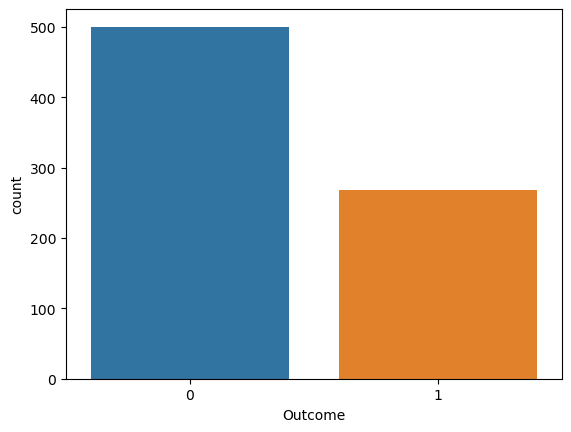

In [9]:
sns.countplot(x=y)

In [10]:
y.value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [18]:
#Now Scaling (equally weight samples)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

In [21]:
#Spliiting the data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, random_state= 0, test_size = 0.25 )

In [22]:
x_train.shape

(576, 8)

In [23]:
x_test.shape

(192, 8)

In [25]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5)

In [26]:
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [27]:
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, classification_report

In [28]:
y_pred = knn.predict(x_test)

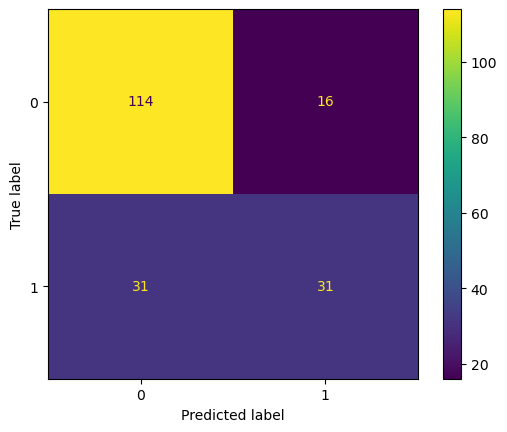

In [29]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [30]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.88      0.83       130
           1       0.66      0.50      0.57        62

    accuracy                           0.76       192
   macro avg       0.72      0.69      0.70       192
weighted avg       0.75      0.76      0.75       192



In [32]:
import matplotlib.pyplot as plt
import numpy as np

In [49]:
#we need to improve the model
#we will find ideal value of K 
#we will put K = 1 to 40 and train the model each time and store the error in the error list
#the value of K for which the error is least, we will that K.
error = []
for k in range(1,41):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    pred = knn.predict(x_test)
    error.append(np.mean(pred != y_test))

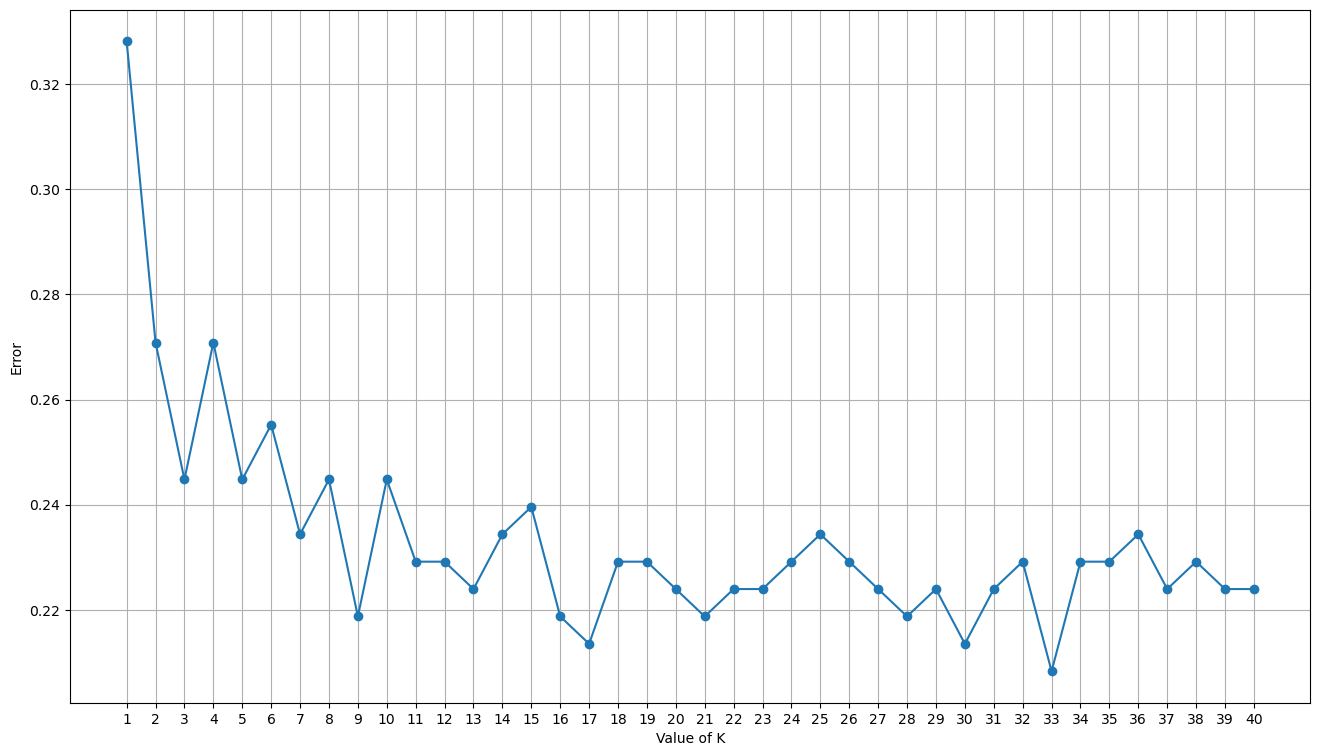

In [45]:
plt.figure(figsize=(16,9))
plt.xlabel('Value of K')
plt.ylabel('Error')
plt.grid()
plt.xticks(range(1,41))
plt.plot(range(1,41), error, marker = 'o')

In [46]:
#At K=33 , we have the lowest error
knn = KNeighborsClassifier(n_neighbors=33)
knn.fit(x_train,y_train)


KNeighborsClassifier(n_neighbors=33)

In [47]:
y_pred = knn.predict(x_test)

In [48]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.94      0.86       130
           1       0.79      0.48      0.60        62

    accuracy                           0.79       192
   macro avg       0.79      0.71      0.73       192
weighted avg       0.79      0.79      0.78       192

